# Analisis de la preferencia de los Pasajeros al Viajar en Taxi


Una nueva empresa de viajes compartidos que se está lanzando en Chicago. Este analisis determina las preferencias de los pasajeros y el impacto de los factores externos en los viajes como el clima.

## 1. Analisis Exploratorio de Datos 

### Importar los archivos

In [1]:
# Cargar todas las librerías
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# Importar archivos 
df_r1 = pd.read_csv("/datasets/project_sql_result_01.csv")
df_r2 = pd.read_csv("/datasets/project_sql_result_04.csv" )
df_r3 = pd.read_csv("/datasets/project_sql_result_07.csv")


###  Información de datos 

In [3]:
# Mostrar datos del resultado 1 y 2
df_r1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
df_r2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
df_r3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [6]:
# Información de DataFrame
df_r1.info()
print()
df_r2.info()
print()
df_r3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_

El primer DataFrame tiene 64 filas y 2 columnas y no hay valores nulos. El segundo contiene 94 filas y 2 columnas y tampoco hay valores nulos.El tercer DataFrame tampoco tiene calores nulos , pero se debe cambiar la columna de weather_conditions  a tipo fecha , pues s encuentra como objeto.



###  Revisión de los datos (Preprosesamiento)

En el primer DataFrame **df_r1** tenemos los siguientes campos : 


| company_name  | trips_amount |
| ------------- | ------------- |
| Son nombres de compañías, que deben ser texto. | La cantidad de viajes es un número entero.  |


En el segundo DataFrame **df_r2** tenemos los siguientes campos : 


| dropoff_location_name  |  average_trips | 
| ------------- | ------------- |
|  Son nombres de zonas de destino, que deben ser texto. |Promedio de viajes puede tener decimales.  |


En el segundo DataFrame **df_r3** tenemos los siguientes campos :

| start_ts | weather_conditions| duration_seconds|
| ------------- | ------------- | ------------- |
|  Debe cambiar a formato fecha | Tipo objeto (Condición del clima)  | Float porque es la duración del viaje|

#### Revisar duplicados :



In [7]:
duplicado_company = df_r1[df_r1.duplicated(subset='company_name', keep=False)]
print(duplicado_company)


Empty DataFrame
Columns: [company_name, trips_amount]
Index: []


No hay valores duplicados de los nombres de las compañias de taxis.

In [8]:
duplicado_location = df_r2[df_r2.duplicated(subset='dropoff_location_name',keep=False )]
print(duplicado_location)

Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


No hay valores duplicados de las locaciones a donde llegan los taxis.

In [9]:
duplicado_weather = df_r3[df_r3.duplicated(subset='weather_conditions', keep=False)]
print(duplicado_weather)

#Se buscan valores duplicados en la columna weather_conditions
df_r3['weather_conditions'].sort_values().unique()

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]


array(['Bad', 'Good'], dtype=object)

Sí econtramos duplicados , pero en este caso revisamos que valores únicos tenian y son goog y bad , porque son las condiciones climáticas , no se debe cambiar nada . 

#### Cambio de tipo y enriquecimiento de datos

In [10]:
#cambiar tipo de dato
df_r3['start_ts'] = pd.to_datetime(df_r3['start_ts'],format='%Y-%m-%d %H:%M')
#verificar cambio
df_r3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [11]:
# Agregar la columansolo del día en el df_r3
df_r3['weekday'] = df_r3['start_ts'].dt.weekday 
df_r3.head(3)

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5


### Principales Barrios donde se finaliza el recorrido 

Usar el DataFrame df_r2, que contiene:

* dropoff_location_name:nombre del barrio donde terminó el viaje

* average_trips:promedio de viajes finalizados en ese barrio en noviembre de 2017

In [12]:
top_10_barrios = df_r2.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_barrios)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


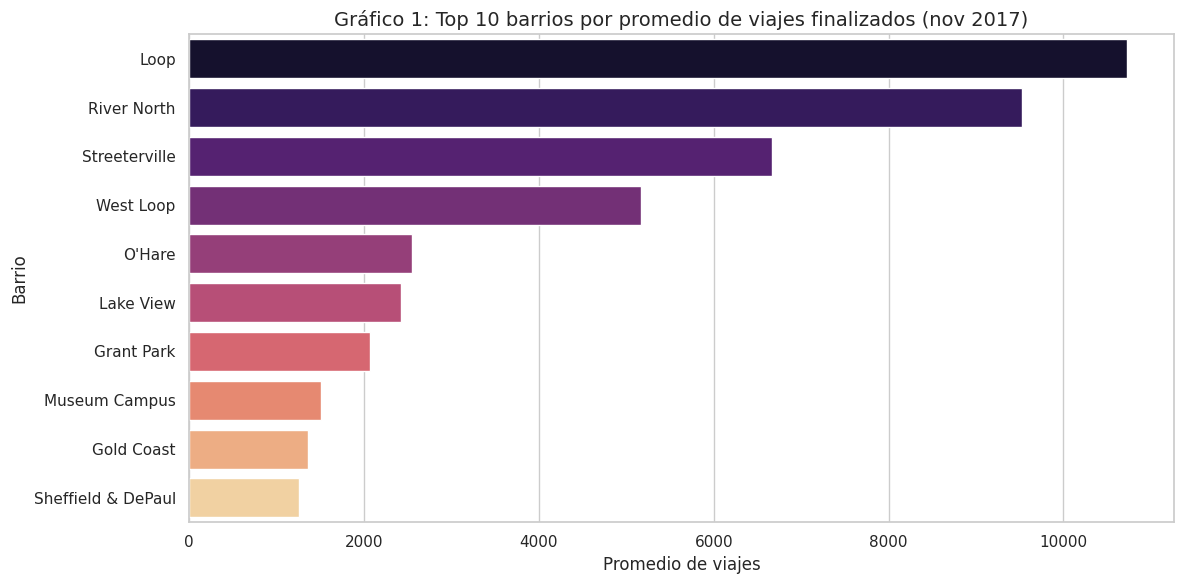

In [13]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_barrios, x='average_trips', y='dropoff_location_name', palette='magma')

# Etiquetas y título
plt.title('Gráfico 1: Top 10 barrios por promedio de viajes finalizados (nov 2017)', fontsize=14)
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

### Empresas de Taxis con mayor número de recorridos

In [14]:
top_10_empresas = df_r1.sort_values(by='trips_amount', ascending=False).head(10)
print(top_10_empresas)


                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


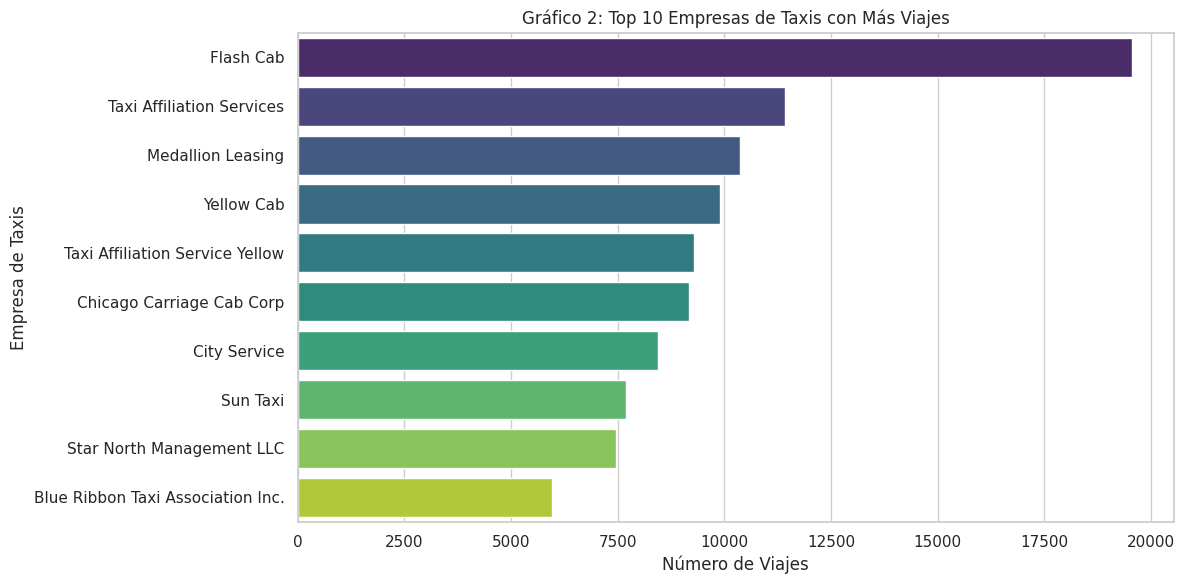

In [15]:
top_10_empresas = df_r1.sort_values(by='trips_amount', ascending=False).head(10)
# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_empresas, x='trips_amount', y='company_name', palette='viridis')
plt.title('Gráfico 2: Top 10 Empresas de Taxis con Más Viajes')
plt.xlabel('Número de Viajes')
plt.ylabel('Empresa de Taxis')
plt.tight_layout()
plt.show()


### Conclusiones

* Los barrios principales a lo cuales se dirigen los taxis en ruta son 1.Loop con 10727.46 viajes promedio, 2. River North con 9523.666667 viajes promedio y en tercer lugar Streeterville  con  6664.66 viajes promedio y el barrrio a donde se dirigen menos los taxis es Sheffield & DePaul  con  1259.76 viajes promedio.
* Las compañías de taxi con mayores viajes son 1. Flash Cab realiza 19558 viajes, 2.Taxi Affiliation Services  realiza 11422 viajes, 3. Medallion Leasing realiza 10367 viajes, la compañía que menos rutas  hace es  Blue Ribbon Taxi Association Inc. unicamente tiene 5953 viajes.


## 2. Análisis Viajes Promedio

### Prueba de Hipotésis

### Objetivo  
Determinar si la **duración promedio de los viajes** desde el Loop hasta el Aeropuerto Internacional O’Hare **cambia los sábados lluviosos**.

### Datos utilizados  
Archivo `project_sql_result_07.csv`, con las siguientes columnas:
- `start_ts`: fecha y hora de inicio del viaje  
- `weather_conditions`: condiciones climáticas (`Good`, `Bad`)  
- `duration_seconds`: duración del viaje en segundos



### Planteamiento de hipótesis

- **Hipótesis nula (H₀):** La duración promedio de los viajes **no cambia** los sábados lluviosos.  
- **Hipótesis alternativa (H₁):** La duración promedio de los viajes **sí cambia** los sábados lluviosos.

**Nivel de significancia**: `α = 0.05`




Establecemos **alfa = 0.05 (5%)**, que es estándar en pruebas estadísticas.
Esto significa que estamos dispuestos a aceptar un 5% de probabilidad de rechazar la hipótesis nula si es verdadera (error tipo I).

**Criterio de Prueba**

Utilizaremos una prueba de hipótesis para dos muestras independientes:

Como comparamos dos grupos (sábados lluviosos vs. otros), usamos la prueba t de Student para muestras independientes **(scipy.stats.ttest_ind()).**

Verificaremos primero si hay normalidad y varianza similar para confirmar si la prueba t es válida (de lo contrario, usamos **equal_var=False)**.

In [16]:
# Crear columnas de día de la semana (como número) y condición de lluvia
df_r3['weekday'] = df_r3['start_ts'].dt.weekday  # Lunes=0, Sábado=5
df_r3['is_saturday'] = df_r3['weekday'] == 5
df_r3['is_rainy'] = df_r3['weather_conditions'] == 'Bad'

# Filtro: sábados lluviosos
df_r3['is_rainy_saturday'] = df_r3['is_saturday'] & df_r3['is_rainy']

# Separar los grupos
group_rainy_saturday = df_r3[df_r3['is_rainy_saturday']]['duration_seconds']
group_others = df_r3[~df_r3['is_rainy_saturday']]['duration_seconds']


In [17]:
# Prueba t para dos muestras independientes con varianzas desiguales

alpha = 0.05
t_stat, p_value = st.ttest_ind(group_rainy_saturday, group_others, equal_var=False)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio SÍ cambia los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente de que la duración promedio cambie.")


Estadístico t: 7.186034288068629
Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula: la duración promedio SÍ cambia los sábados lluviosos.


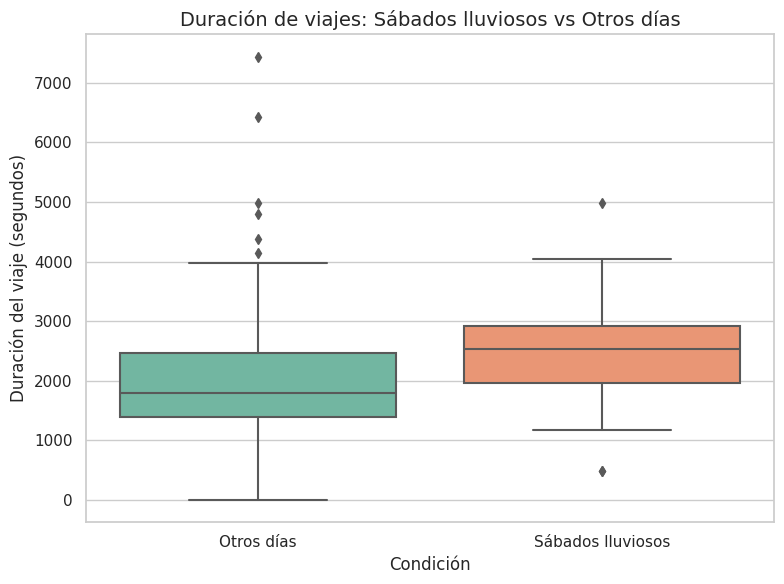

In [18]:
# Crear una nueva columna categórica para el gráfico
df_r3['group'] = df_r3['is_rainy_saturday'].map({True: 'Sábados lluviosos', False: 'Otros días'})

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='duration_seconds', data=df_r3, palette='Set2')

# Agregar título y etiquetas
plt.title('Duración de viajes: Sábados lluviosos vs Otros días', fontsize=14)
plt.xlabel('Condición', fontsize=12)
plt.ylabel('Duración del viaje (segundos)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El boxplot muestra que los sábados lluviosos tienen:

Una mediana de duración más alta (la línea horizontal dentro de la caja está más arriba).

Mayor dispersión: los tiempos de viaje tienden a ser más variables.

Esto respalda visualmente el resultado estadístico.

### Método  
1. Se creó una variable `is_rainy_saturday` que identifica los sábados con clima `Bad`.  
2. Se compararon dos grupos:
   - Grupo 1: viajes realizados en sábados lluviosos  
   - Grupo 2: todos los demás viajes  
3. Se aplicó una **prueba t para muestras independientes** con varianzas desiguales (`equal_var=False`).


### Resultados

- **Estadístico t**: `7.19`  
- **Valor p**: `6.74 × 10⁻¹²`


### Conclusión

Dado que el valor p es **mucho menor** que 0.05, **rechazamos la hipótesis nula**.

Existe evidencia estadísticamente significativa para afirmar que **la duración promedio de los viajes cambia los sábados lluviosos**.
